# **PMR3508 - Exercício Programa 02**: <br> **Redes Neurais e o Dataset MNIST**
---
---

## ✏️ **Cabeçalho**:

### **Nome**: `[Narayan Shimanoe Lisboa]`
### **NUSP**: `[14600141]`
### **Hash**: `[32]`

---

## 📜 **Descrição:**

Neste exercício, você irá trabalhar com o **dataset MNIST**, um conjunto de dados com 70.000 imagens de dígitos escritos à mão. Seu objetivo será aplicar os conceitos de **Redes Neurais Artificiais (ANNs)** vistos na aula teórica. Este EP está dividido em tarefas, sua formatação não deve ser alterada, mas novas células de código ou texto podem ser criadas nos blocos de cada tarefa.

---

## ⚠️ **Instruções:**
- Complete todas as tarefas abaixo, respondendo às perguntas e escrevendo o código necessário.
- Comente seu código para facilitar a correção.
- Entregue o notebook no formato `.ipynb`.

---

## ✅ **Tarefas:**

1. **Probabilidades de dígitos no *dataset***       ⇒ `2 pontos`
2. **Análise Exploratória de Dados (EDA)**          ⇒ `2 pontos`
3. **Treinamento e teste de Modelos**               ⇒ `2 pontos`
4. **Comunicação de Resultados e Visualizações**    ⇒ `2 pontos`
5. **Publicação no *Kaggle* e Documentação**        ⇒ `2 pontos`

---

<br>
<center>
        <h1>
        <b>
        BOA SORTE !!!
        </b>
        </h1>
</center>
<br>

---
---

## ⏳ Loading dos Dados

In [1]:
import pickle
import random
import numpy as np
import os
from os.path import join

# Configuração de seeds para replicabilidade
np.random.seed(42)  # Seed para NumPy
random.seed(42)     # Seed para o módulo random

input_path = '/kaggle/input/pmr3508-mnist/' #os.getcwd()  # Obtém o diretório atual
images_filepath = join(input_path, 'MNIST-images.pkl')
labels_filepath = join(input_path, 'MNIST-labels.pkl')
validation_images_filepath = join(input_path, 'MNIST-validation-images.pkl')

with open(images_filepath, 'rb') as f:
    X_tot = pickle.load(f)

with open(labels_filepath, 'rb') as f:
    y_tot = pickle.load(f)

with open(validation_images_filepath, 'rb') as f:
    X_val = pickle.load(f)

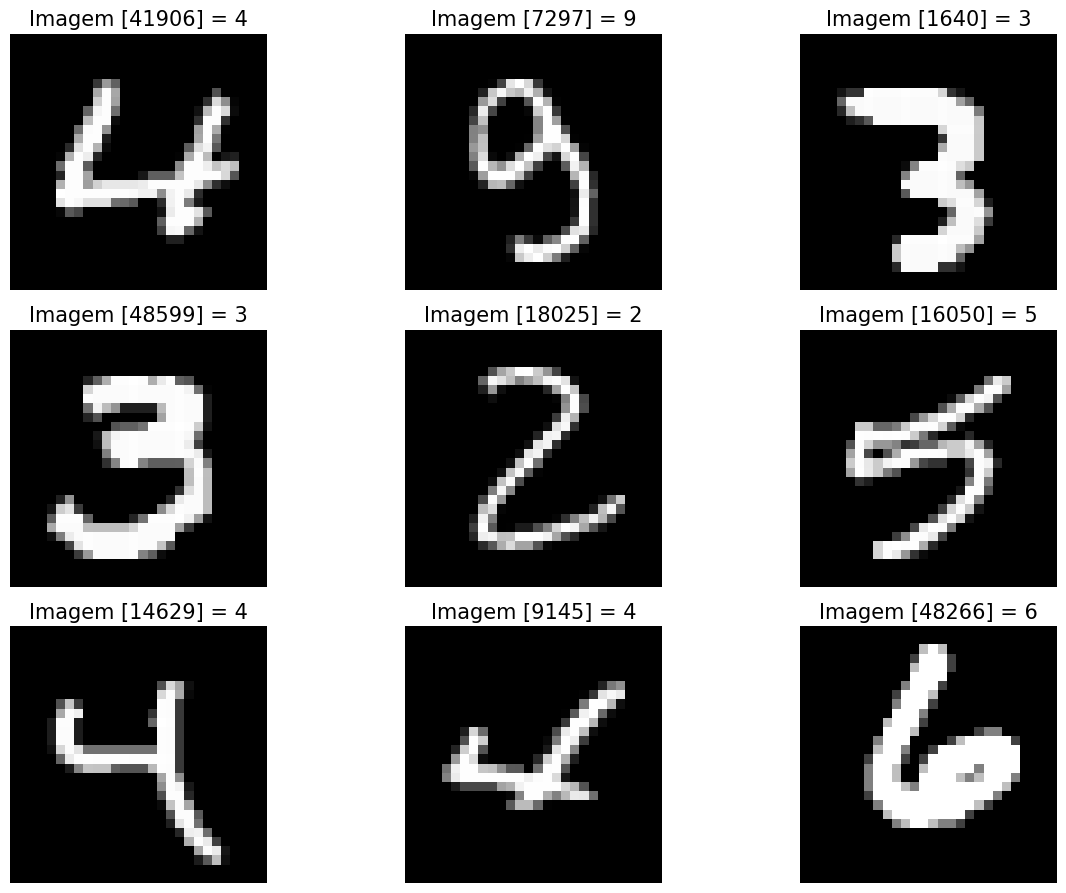

In [2]:
'''
TESTE DE CARREGAMENTO DO DATASET POR VISUALIZAÇÃO
Este bloco visualiza algumas imagens do dataset MNIST para verificar se o
carregamento foi realizado corretamente.
'''

%matplotlib inline
import random
import matplotlib.pyplot as plt

def show_images(images, title_texts):
    # Função para mostrar as imagens com seus respectivos títulos
    cols = 3  # Número de colunas na visualização
    rows = int(len(images) / cols) + 1  # Calcula o número de linhas
    plt.figure(figsize=(12, 12))  # Define o tamanho da figura
    index = 1
    for x in zip(images, title_texts):  # Itera sobre as imagens e títulos
        image = x[0]
        title_text = x[1]
        plt.subplot(rows, cols, index)  # Adiciona um subplot
        plt.axis('off')  # Desativa os eixos
        plt.imshow(image, cmap=plt.cm.gray)  # Mostra a imagem em escala de cinza
        if (title_text != ''):
            plt.title(title_text, fontsize=15)  # Define o título da imagem
        index += 1
    plt.tight_layout()  # Ajusta o layout para evitar sobreposição de títulos
    plt.show()  # Exibe a figura com as imagens e títulos

images_2_show = []  # Lista para armazenar as imagens a serem mostradas
titles_2_show = []  # Lista para armazenar os títulos das imagens
# Seleciona aleatoriamente 9 imagens de treino
for i in range(0, 9):
    r = random.randint(1, 60000)
    images_2_show.append(X_tot[r])  # Adiciona a imagem selecionada à lista
    titles_2_show.append(f"Imagem [{str(r)}] = {str(y_tot[r])}")  # Adiciona o título correspondente

show_images(images_2_show, titles_2_show)  # Exibe as imagens selecionadas

# 0️⃣ Suas bibliotecas

In [3]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

# 1️⃣ Tarefa 01: Probabilidades 🎲

## 🧑🏻‍💻 Item a)

Descubra o número do Dataset associado ao seu Hash.

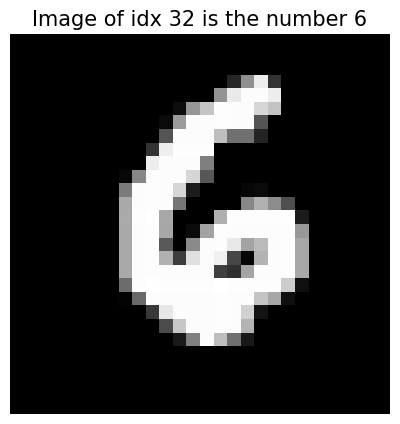

In [4]:
show_images([X_tot[32]], [f"Image of idx 32 is the number {y_tot[32]}"])

### O número a ser trabalhado na primeira parte é o número 6

## 🔦 Item b)

Determine, para a imagem vinculada ao seu Hash, qual é a Probabilidade de um píxel claro (128 - 225) para esta única imagem?

In [5]:

filtro_claro = np.sum((X_tot[32] >= 128) & (X_tot[32] <= 225)) #numero de pixeis claros
total = 28*28 #como a imagem é de 28x28 o número total de pixeis vai ser 

print(f" A probabilidade de ser um pixei claro é de {filtro_claro/total*100:.2f}%")

 A probabilidade de ser um pixei claro é de 5.48%


## ♟️ Item c)

Qual é a probabilidade de um píxel ser claro dentre todos os píxeis que tem a mesma classe que a sua imagem obtida em a)?

In [6]:
numero_6 = X_tot[y_tot == 6]

filtro_claro = np.sum((numero_6 >= 128) & (numero_6 <= 225))
numero_total = np.sum(y_tot == 6)*28*28 #o número total de pixeis vai ser o numero toal de numero 6 vezes 28x28
print(f"A probabilidade de o píxel ser claro dentre todos o píxeis do número 6 é {filtro_claro/numero_total*100:.2f}%")

A probabilidade de o píxel ser claro dentre todos o píxeis do número 6 é 4.42%


---

# 2️⃣ Tarefa 02: Análise Exploratória de Dados 📊

## ✨ Item a)

Conte quantas vezes cada dígito (de 0 a 9) aparece e responda:

1. Todos os dígitos aparecem a mesma quantidade?

2. Qual o valor médio dos píxeis de cada dígito?

In [7]:
#a1
for i in range(0,10):
    total = np.sum(y_tot == i)
    print(f" O numero {i} aparece {total} vezes na base de dados")

 O numero 0 aparece 5920 vezes na base de dados
 O numero 1 aparece 6725 vezes na base de dados
 O numero 2 aparece 6023 vezes na base de dados
 O numero 3 aparece 6107 vezes na base de dados
 O numero 4 aparece 5918 vezes na base de dados
 O numero 5 aparece 5376 vezes na base de dados
 O numero 6 aparece 5915 vezes na base de dados
 O numero 7 aparece 6238 vezes na base de dados
 O numero 8 aparece 5856 vezes na base de dados
 O numero 9 aparece 5922 vezes na base de dados


### Resposta 01: Como é possível ver na tabela acima os números não aparecem na mesma quantitadade

In [8]:
#a2
for i in range(0,10):
    media = np.mean(X_tot[y_tot == i])
    print(f"o número {i} possue uma média de pixeis de {media:.4f}")

o número 0 possue uma média de pixeis de 44.2282
o número 1 possue uma média de pixeis de 19.4027
o número 2 possue uma média de pixeis de 38.0212
o número 3 possue uma média de pixeis de 36.2322
o número 4 possue uma média de pixeis de 31.0416
o número 5 possue uma média de pixeis de 32.9240
o número 6 possue uma média de pixeis de 35.2435
o número 7 possue uma média de pixeis de 29.2555
o número 8 possue uma média de pixeis de 38.4030
o número 9 possue uma média de pixeis de 31.3396


## 📏 Item b)

Faça um histograma que mostre a distribuição dos valores dos píxeis para cada dígito. Há muitos valores que são “apagados” (ou seja, com valor 0) ou a distribuição dos valores é mais equilibrada entre os dígitos?

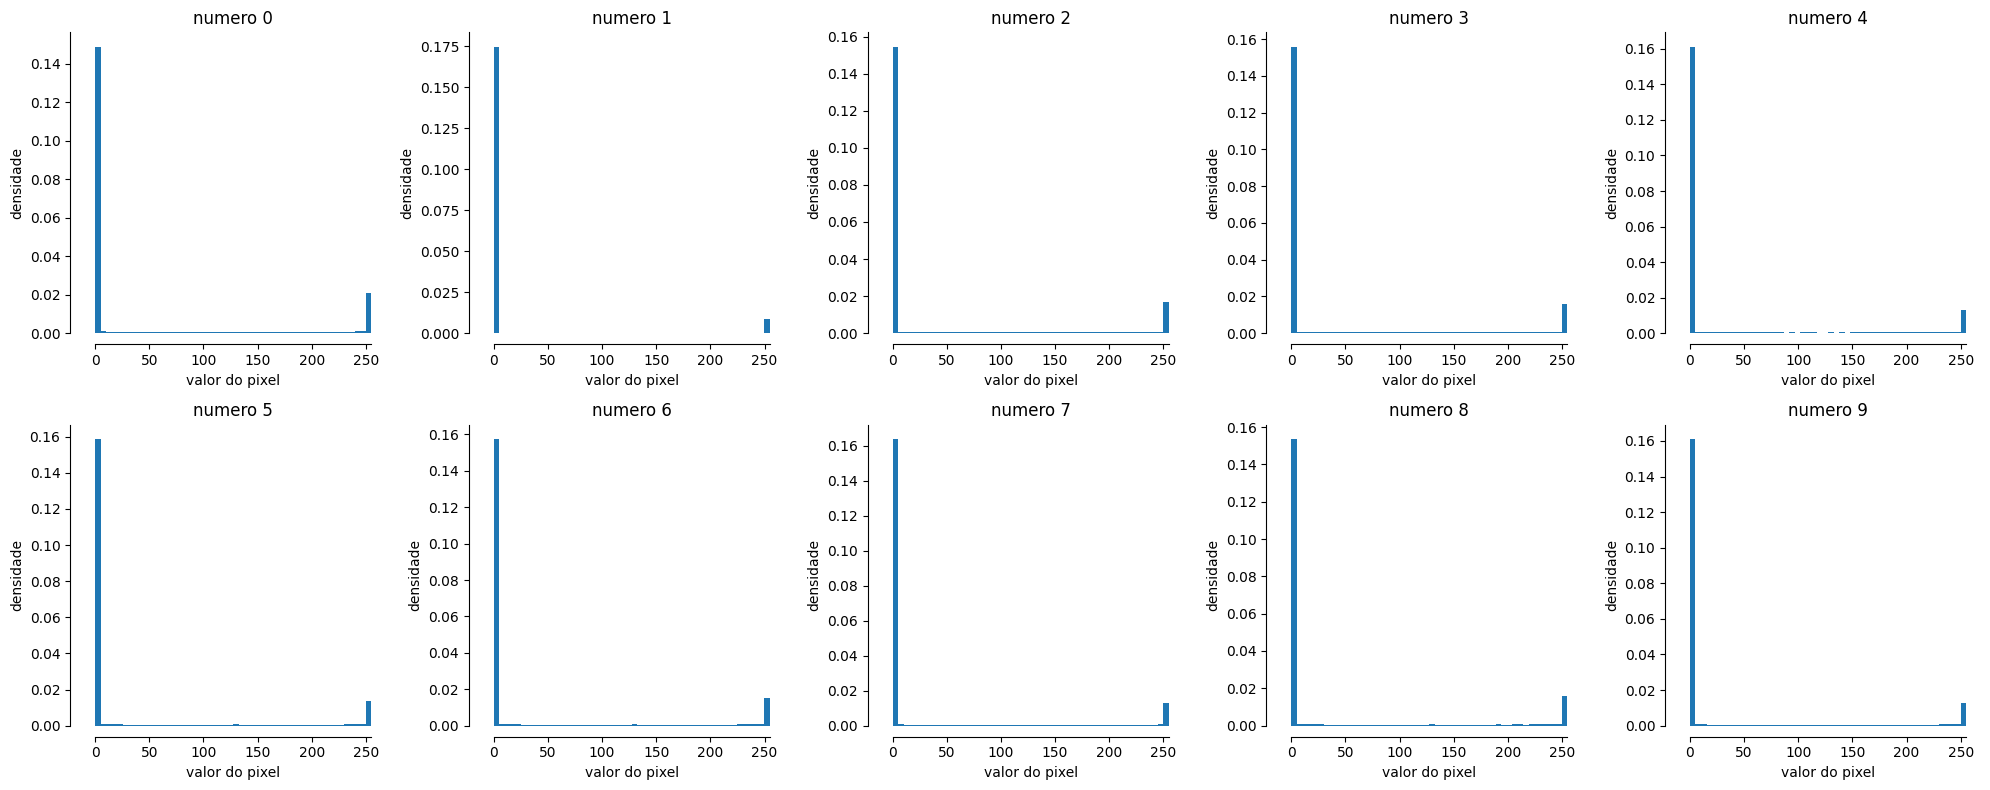

In [9]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for i in range(0,10):
    digit_images = X_tot[y_tot == i]
    
    axes[i].hist(digit_images.ravel(), bins=50, density=True)
    axes[i].set_title(f"numero {i}")
    axes[i].set_xlabel("valor do pixel")
    axes[i].set_ylabel("densidade")
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_position(('outward', 8))
    axes[i].spines['bottom'].set_position(('outward', 8))
    axes[i].spines['bottom'].set_bounds(0, 255)
    

plt.tight_layout()
plt.show()

### É possível perceber que a maioria dos valore são os "apagados", e um pequeno valor no 255, de resto, os outros valores tem pouca concentração.
### Esse comportamente é percebido em todos os números.

## 🤓 Item c)

Crie uma imagem para cada dígito (de 0 a 9) em que cada píxel dessa nova imagem representa a média do valor dos píxeis para aquela classe. Você consegue reconhecer os dígitos nas imagens criadas?

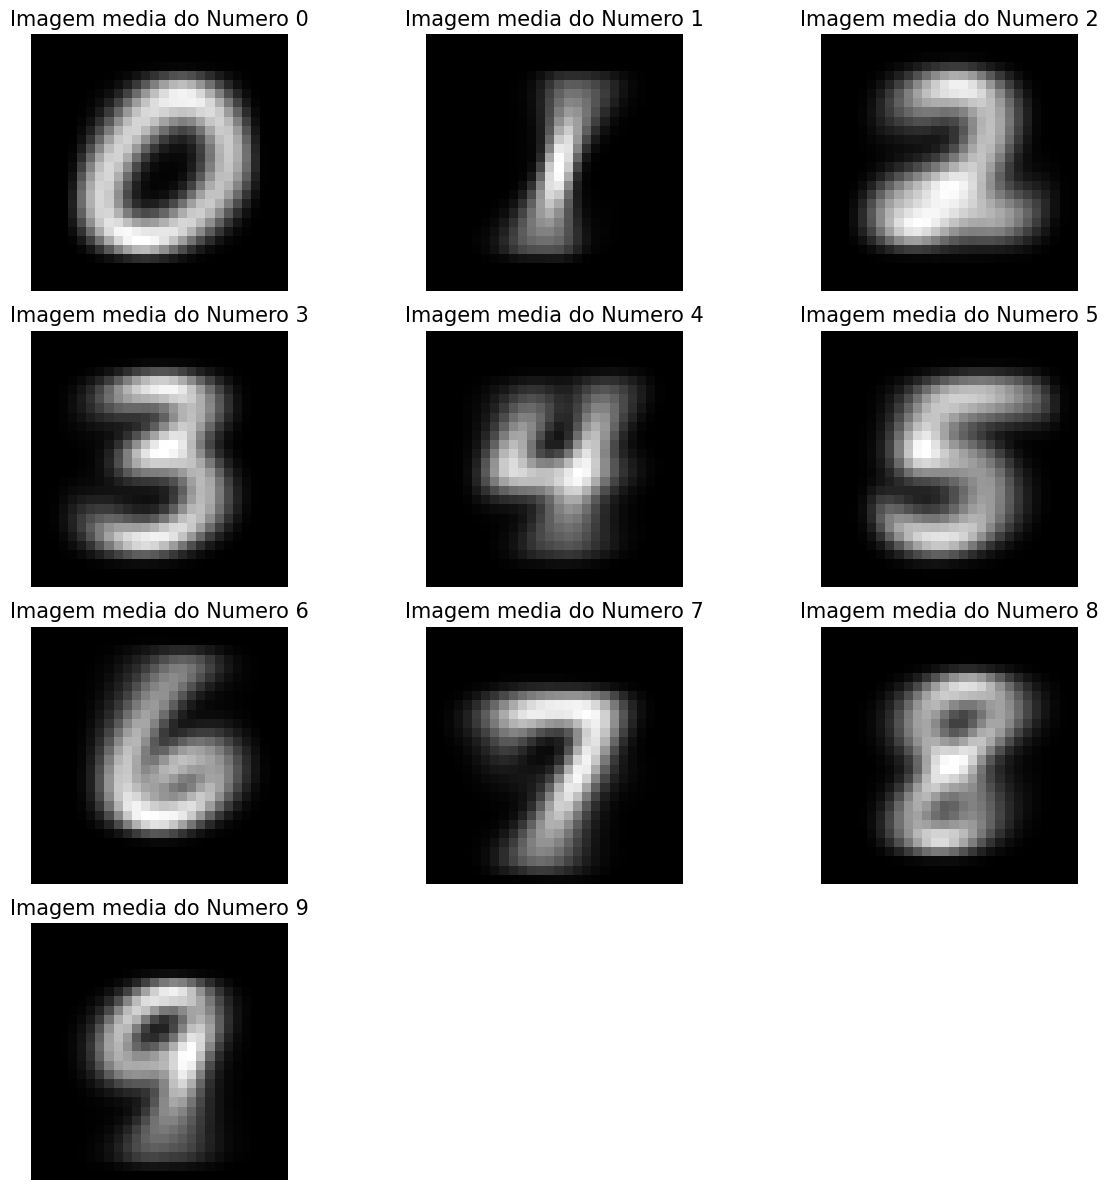

In [10]:
images_2_show = []  # Lista para armazenar as imagens a serem mostradas
titles_2_show = []  # Lista para armazenar os títulos das imagens

for i in range(0, 10):
    images_2_show.append(np.mean(X_tot[y_tot == i], axis = 0))  # Adiciona a imagem selecionada à lista
    titles_2_show.append(f"Imagem media do Numero {i}")  # Adiciona o título correspondente

show_images(images_2_show, titles_2_show)  # Exibe as imagens selecionadas

###  Resposta: É possível diferenciar os a média dos pixeis dos números com certa facilidade, Parecem apenas que estão borrados.

---

# 3️⃣ Tarefa 03: Treinamento e Teste de Modelos 🤖

### Preparando dados de treino

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tot.reshape(-1, 28 * 28) / 255, y_tot, test_size=10000, random_state=42)

## 📈 Item a)

Treine a ANN1 com 784 entradas, 8 neurônios na 1⁠ª camada oculta, 8 neurônios na 2⁠ª camada oculta e 10 saídas. Utilize 5 épocas para o treinamento. Use a biblioteca `scikit-learn`:

- Input Layer: 784 entradas (28x28);
- Hidden Layer 1: 8 neurônios;
- Hidden Layer 2: 8 neurônios;
- Output Layer: 10 saídas; (Classificador 0-9)
- Treine com 10 épocas.

In [12]:
# Definição das Constante

hidden_layer = (8,8)
epochs = 10

In [13]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

ANN1 = MLPClassifier(hidden_layer_sizes = hidden_layer, max_iter = epochs, random_state = 1)

ANN1.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8, 8), max_iter=10, random_state=1)

In [14]:
prediction_train_1 = ANN1.predict(X_train) # Predição dos resultados de Treino
accuracy_train_1 = accuracy_score(y_train, prediction_train_1) #Comparação com o resultado
print(f"A acurácia dos dados de treino foi de {accuracy_train_1*100:.2f}%")

prediction_test_1 = ANN1.predict(X_test) # Predição dos resultados de teste
accuracy_test_1 = accuracy_score(y_test, prediction_test_1) #Comparação com o resultado
print(f"A acuracia dos dados de teste foi de {accuracy_test_1*100:.2f}%")

A acurácia dos dados de treino foi de 92.33%
A acuracia dos dados de teste foi de 91.64%


## 📉 Item b)

Treine a ANN2 com 784 entradas, 256 neurônios na 1⁠ª camada oculta, 256 neurônios na 2⁠ª camada oculta, 256 neurônios na 3ª camada oculta, 256 neurônios na 4ª camada oculta e 10 saídas. Utilize 20 épocas dessa vez. Use a biblioteca `scikit-learn`.

- Input Layer: 784 entradas (28x28);
- Hidden Layer 1: 256 neurônios;
- Hidden Layer 2: 256 neurônios;
- Hidden Layer 3: 256 neurônios;
- Hidden Layer 4: 256 neurônios;
- Output Layer: 10 saídas; (Classificação 0-9)
- Treine com 20 épocas.

In [15]:
# DEFINIÇÃO DAS NOVAS CONSTANTES

hidden_layer = (256, 256, 256, 256)
epochs = 20

In [16]:
ANN2 = MLPClassifier(hidden_layer_sizes = hidden_layer, max_iter = epochs, random_state = 1)

ANN2.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(256, 256, 256, 256), max_iter=20,
              random_state=1)

In [17]:
prediction_train_2 = ANN2.predict(X_train) # Predição dos resultados de Treino
accuracy_train_2 = accuracy_score(y_train, prediction_train_2) #Comparação com o resultado
print(f"A acurácia dos dados de treino foi de {accuracy_train_2*100:.2f}%")

prediction_test_2 = ANN2.predict(X_test) # Predição dos resultados de teste
accuracy_test_2 = accuracy_score(y_test, prediction_test_2) #Comparação com o resultado
print(f"A acuracia dos dados de teste foi de {accuracy_test_2*100:.2f}%")

A acurácia dos dados de treino foi de 99.71%
A acuracia dos dados de teste foi de 97.92%


## ⚙️ Item c)

Agora você treinará um novo modelo, mais adequado. Para isso, gere ao menos 5 configurações de redes neurais, variando o número de camadas ocultas, o número de neurônios e o número de épocas. As configurações devem estar intermediárias entre `[8, 8]` e `[256, 256, 256, 256]`.

Utilize a função `GridSearchCV` para realizar uma busca exaustiva pelos hiperparâmetros e encontre a configuração que oferece o melhor classificador, justificando sua escolha com base nas métricas de validação.

In [18]:
# DEFINIÇÃO DA NOVAS CONSTANTES

dictionary = {"hidden_layer_sizes" : [(256, 128, 256, 128), (256, 64, 32, 8), (256, 256, 128), (256, 128, 64), (16, 8)],
             "max_iter" : [15]}

In [19]:
from sklearn.model_selection import GridSearchCV

FANN = GridSearchCV(MLPClassifier(), dictionary, cv=5, scoring="accuracy")
FANN.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [(256, 128, 256, 128),
                                                (256, 64, 32, 8),
                                                (256, 256, 128), (256, 128, 64),
                                                (16, 8)],
                         'max_iter': [15]},
             scoring='accuracy')

In [20]:
best_layer = FANN.best_params_["hidden_layer_sizes"]
best_acuracy = FANN.best_score_
print(f"O melhor modelo foi o {best_layer}, obtendo uma acuracia de {best_acuracy*100:.2f}%")

O melhor modelo foi o (256, 256, 128), obtendo uma acuracia de 97.55%


### Teste para o melhor Layer de Neuronios

In [21]:
# DEFINIÇÃO DAS NOVAS CONSTANTES DO MELHOR DADO DE TREINO

hidden_layer = (256, 256, 128)
epochs = 20

In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

ANNF = MLPClassifier(hidden_layer_sizes = hidden_layer, max_iter = epochs, random_state = 1)

train_losses = []
val_losses = []
train_accs = []
val_accs = []


for i in range(20):
    ANNF.partial_fit(X_train, y_train, classes = [k for k in range(10)])
    
    pred_train = ANNF.predict(X_train)
    train_losses.append(ANNF.loss_)
    train_accs.append(accuracy_score(y_train, pred_train))
    
    pred_val = ANNF.predict_proba(X_test)
    val_losses.append(log_loss(y_test, pred_val, labels=[k for k in range(10)]))
    val_accs.append(accuracy_score(y_test, np.argmax(pred_val, axis=1)))

ANNF.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(256, 256, 128), max_iter=20, random_state=1)

In [23]:
prediction_train_3 = ANNF.predict(X_train) # Predição dos resultados de Treino
accuracy_train_3 = accuracy_score(y_train, prediction_train_3) #Comparação com o resultado
print(f"A acurácia dos dados de treino foi de {accuracy_train_3*100:.2f}%")

prediction_test_3 = ANNF.predict(X_test) # Predição dos resultados de teste
accuracy_test_3 = accuracy_score(y_test, prediction_test_3) #Comparação com o resultado
print(f"A acuracia dos dados de teste foi de {accuracy_test_3*100:.2f}%")

A acurácia dos dados de treino foi de 99.58%
A acuracia dos dados de teste foi de 97.74%


## 🔧 Item d)

Para os modelos treinados nas questões a) e b), além do classificador encontrado na questão c), compare o desempenho dos modelos, analisando se apresentam *underfitting* ou *overfitting*. Justifique com gráficos e análises.

In [24]:
from sklearn.metrics import classification_report

In [25]:
## Testar Desempenho dos Modelos

In [26]:
# Testedo modelo 1:[8,8]
print(classification_report(y_test, prediction_test_1))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       997
           1       0.95      0.97      0.96      1158
           2       0.89      0.92      0.90      1007
           3       0.90      0.87      0.88      1028
           4       0.91      0.93      0.92       966
           5       0.90      0.83      0.86       885
           6       0.93      0.96      0.94       945
           7       0.94      0.94      0.94      1070
           8       0.89      0.86      0.88       988
           9       0.89      0.92      0.90       956

    accuracy                           0.92     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.92      0.92     10000



In [27]:
# testo do modelo 2: 
print(classification_report(y_test,prediction_test_2 ))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       997
           1       0.99      0.98      0.99      1158
           2       0.99      0.97      0.98      1007
           3       0.97      0.98      0.97      1028
           4       0.98      0.98      0.98       966
           5       0.97      0.97      0.97       885
           6       0.99      0.98      0.99       945
           7       0.99      0.98      0.98      1070
           8       0.98      0.97      0.98       988
           9       0.95      0.99      0.97       956

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [28]:
print(classification_report(y_test,prediction_test_3 ))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       997
           1       0.99      0.99      0.99      1158
           2       0.95      0.99      0.97      1007
           3       0.98      0.96      0.97      1028
           4       0.99      0.97      0.98       966
           5       0.97      0.98      0.97       885
           6       0.97      1.00      0.98       945
           7       0.99      0.96      0.98      1070
           8       0.97      0.97      0.97       988
           9       0.96      0.98      0.97       956

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



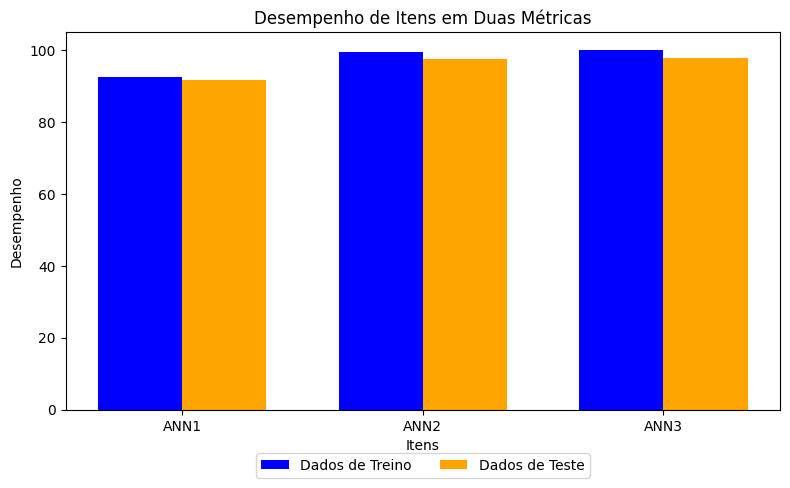

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Dados de exemplo
items = ['ANN1', 'ANN2', 'ANN3']
metric1 = [92.33, 99.42, 99.81]  # Métrica 1
metric2 = [91.64, 97.38, 97.79]  # Métrica 2

# Configuração do gráfico
x = np.arange(len(items))  # Posições das barras
width = 0.35  # Largura das barras

fig, ax = plt.subplots(figsize=(8, 5))

# Criando as barras
bars1 = ax.bar(x - width/2, metric1, width, label='Dados de Treino', color='blue')
bars2 = ax.bar(x + width/2, metric2, width, label='Dados de Teste', color='orange')

# Adicionando informações ao gráfico
ax.set_xlabel('Itens')
ax.set_ylabel('Desempenho')
ax.set_title('Desempenho de Itens em Duas Métricas')
ax.set_xticks(x)
ax.set_xticklabels(items)
ax.legend()
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

## Resposta Item d)
A acurácia para para os dados de Treino são maiores que os Dados de Teste nos 3 cacos, como é de se esperar.

O modelo ANN1 obeteve um desempenho considerável menor que os outros, pois o modelo possue poucos "layers" o que causou um "underfitting" durante o treinamento para aprender os padrões.

O modelo ANN2 Obteve uma acurácia quase perfeita nos dados de treino, mas nos dados de teste foi a baixo do esperado pois o modelo possue muitos "layers" o que causando um "overfitting" no reconhecimento de padrões.

---

# 4️⃣ Tarefa 04: Resultados e Visualizações 🤞🏻

## 🐳 Item a)

Gere e apresente uma matriz de confusão que mostre a distribuição das previsões do melhor modelo. Quais as métricas de Acurácia, Precisão, Recall e F1-Score para esse modelo?

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

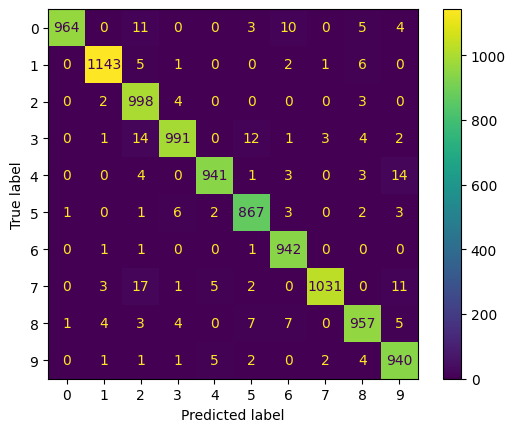

In [31]:
confusion = confusion_matrix(y_test,prediction_test_3)
display = ConfusionMatrixDisplay(confusion_matrix=confusion)
display.plot()

In [32]:
print(classification_report(y_test,prediction_test_3 ))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       997
           1       0.99      0.99      0.99      1158
           2       0.95      0.99      0.97      1007
           3       0.98      0.96      0.97      1028
           4       0.99      0.97      0.98       966
           5       0.97      0.98      0.97       885
           6       0.97      1.00      0.98       945
           7       0.99      0.96      0.98      1070
           8       0.97      0.97      0.97       988
           9       0.96      0.98      0.97       956

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## 🐸 Item b)

Exiba gráficos que mostram a evolução da acurácia e da perda (`Loss`) durante o treinamento do melhor modelo encontrado no item 3c).

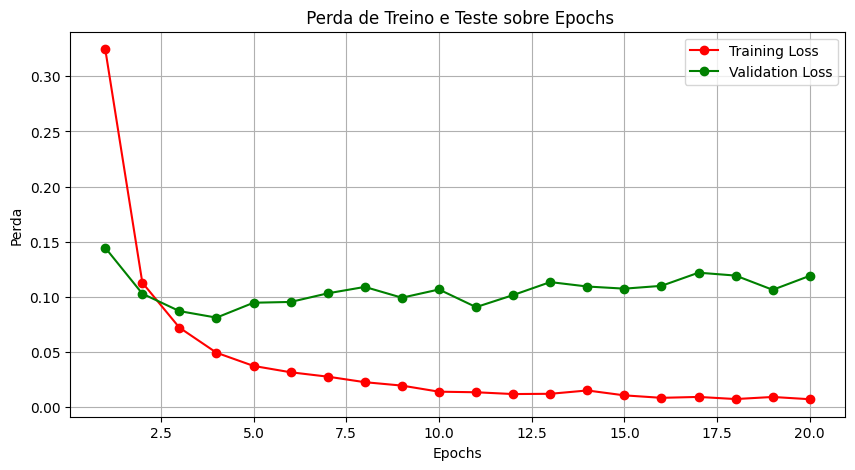

In [33]:
epochs = range(1, len(train_losses) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, train_losses, label='Training Loss', color='red', marker='o')
plt.plot(epochs, val_losses, label='Validation Loss', color='green', marker='o')
    
plt.xlabel('Epochs')
plt.ylabel('Perda')
plt.title(' Perda de Treino e Teste sobre Epochs')
plt.legend()
plt.grid(True)
plt.show()

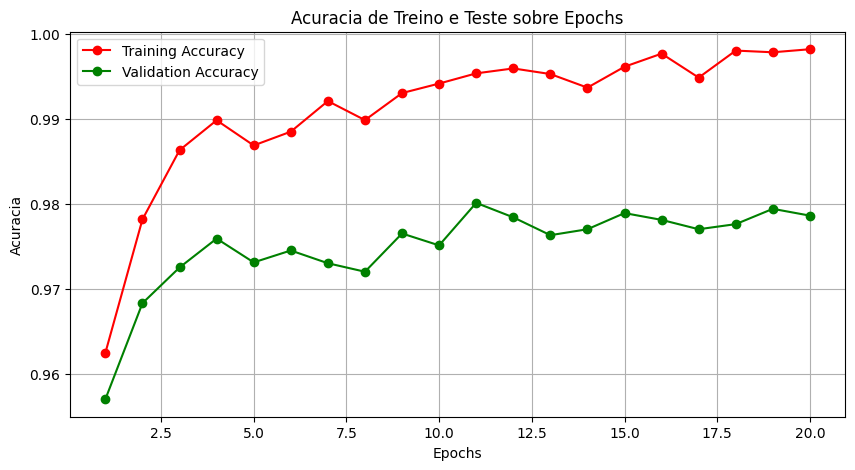

In [34]:
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_accs, label='Training Accuracy', color='red', marker='o')
plt.plot(epochs, val_accs, label='Validation Accuracy', color='green', marker='o')
    
plt.xlabel('Epochs')
plt.ylabel('Acuracia')
plt.title('Acuracia de Treino e Teste sobre Epochs')
plt.legend()
plt.grid(True)
plt.show()

## 🦖 Item c)

Escolha algumas imagens do conjunto de teste e mostre previsões do seu modelo, com acertos e erros. Discuta quais fatores podem ter contribuído para essas previsões corretas e incorretas.

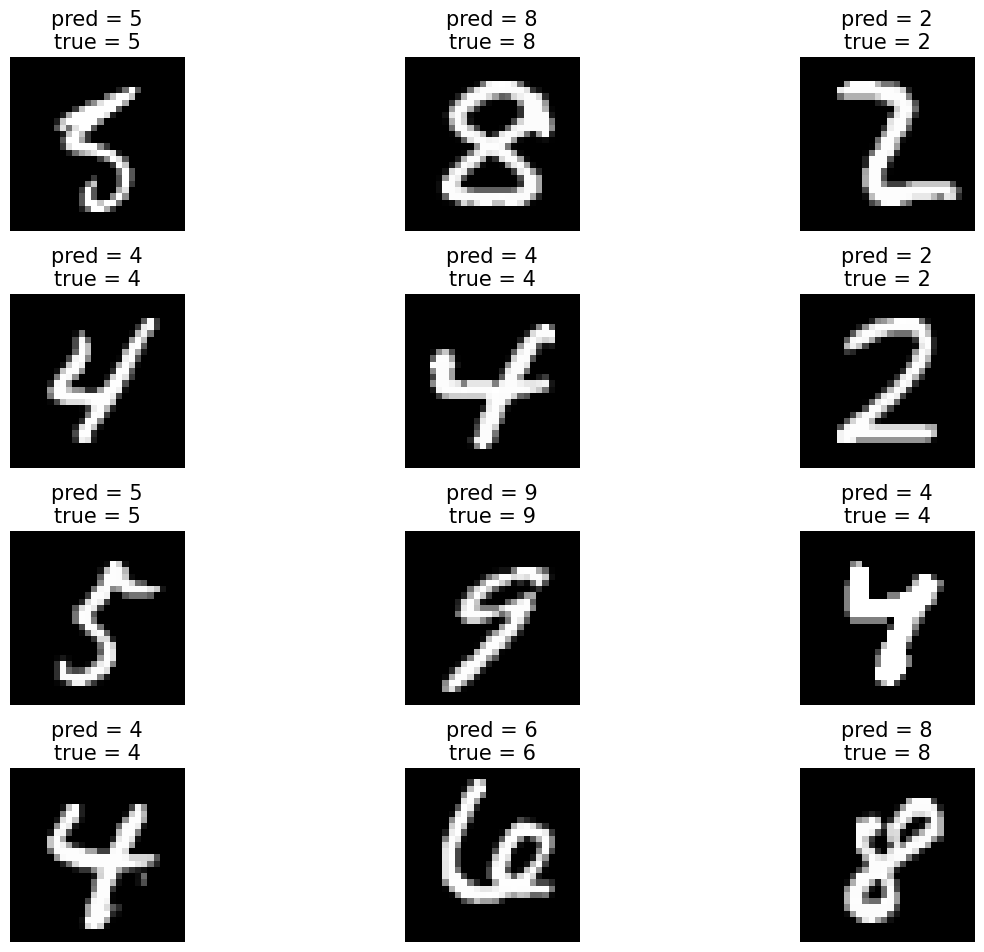

In [35]:
X_test = X_test.reshape(-1, 28, 28)

X_right = X_test[y_test == prediction_test_3]
y_pred_right = prediction_test_3[y_test == prediction_test_3]
y_true_right = y_test[y_test == prediction_test_3]

show_images(X_right[:12], [f'pred = {y_pred_right[k]}\ntrue = {y_true_right[k]}' for k in range(12)])

## Resposta:
    As Respostas que o modelo foi capaz de accertar são números facilmeente distinguiveis. Todos esses números não possue nenhuma ambiguidade e no máximo possue uma linha a mais, mas isso não alterou a acertividade do modelo.

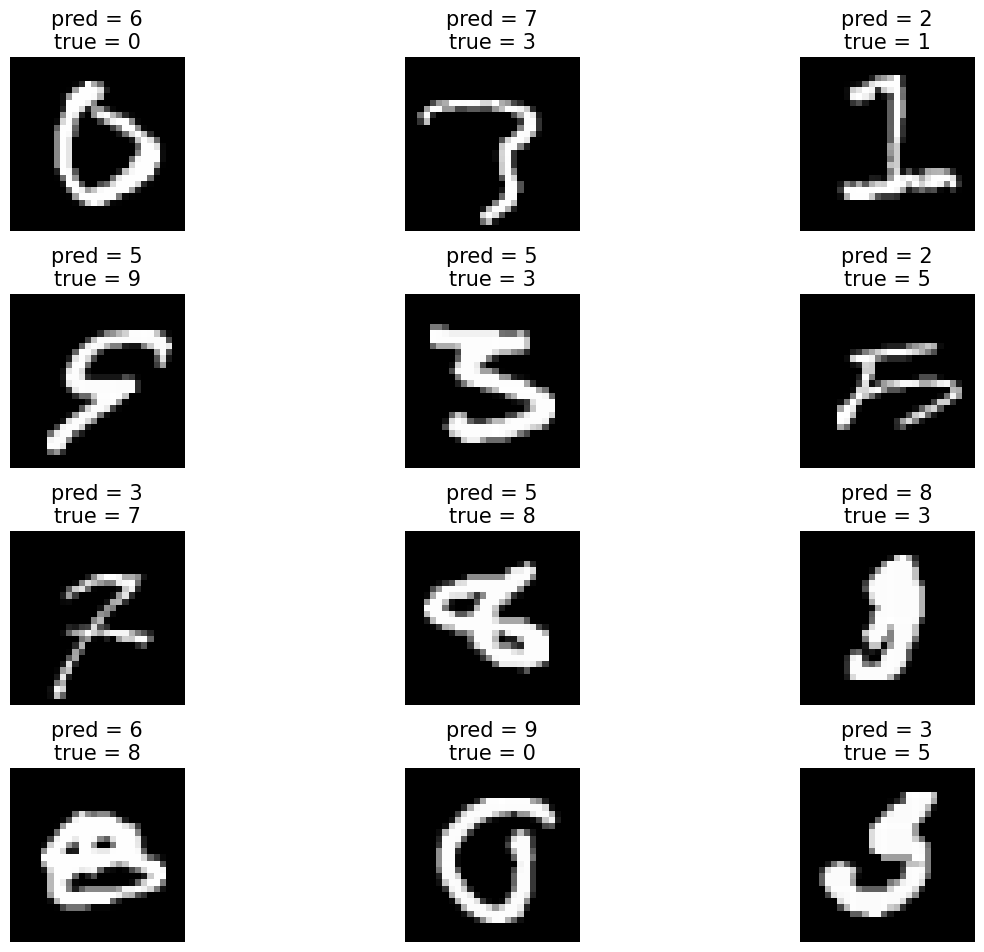

In [36]:


X_wrong = X_test[y_test != prediction_test_3]
y_pred_wrong = prediction_test_3[y_test != prediction_test_3]
y_true_wrong = y_test[y_test != prediction_test_3]

show_images(X_wrong[:12], [f'pred = {y_pred_wrong[k]}\ntrue = {y_true_wrong[k]}' for k in range(12)])

## Resposta:
 A segunda Imagem (pred = 9, true = 4) e a sétimo (pred = 7, true = 9) são imagens que são facilmente distinguiveis e que o modelo errou.
 A segunda Imagem houve erro provavelmente por conta da abertura a cima, que se fechada se assemelharia muito com a letra 9, e o modelo não foi capaz de perceber essa abertura e causou o erro.
 A sérima imagem, é claramente um 9, mas o modelo errou pela linha reta na vertical e as intersecções em cima e no meio que fez com que o modelo achasse que fossse um 7.
 
 De resto, todas as imagens são de dificil distinção e até um pouco irreconhecíveis, isso causou o erro do modelo. De forma metefórica, podem ser entendidos como "outliers".

# Repartição para envio da competição

## Preparação do dados

In [37]:
X_train = X_tot.reshape(-1,28 * 28) / 255
y_train = y_tot

## Treinamento do modelo

In [38]:
ANN4 = MLPClassifier(hidden_layer_sizes = (256,256,128), max_iter = 20, random_state = 1)

ANN4.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(256, 256, 128), max_iter=20, random_state=1)

## Envio para a competição

In [39]:
with open(validation_images_filepath, 'rb') as f:
    X_test = pickle.load(f)

final_predction = ANN4.predict(X_test.reshape(-1,28 * 28) / 255)

In [40]:
df = pd.DataFrame({'ID': np.arange(1,10001), 'Answer':final_predction})
df.set_index("ID", inplace=True)
df.to_csv('submission.csv')
df.head()

,Answer
ID,
1,8
2,4
3,8
4,7
5,7


---

# 5️⃣ Tarefa 05: Lembrete *Kaggle* e Documentação 🗃️

## 😮‍💨 Item a)

# Lembre-se de publicar no *Kaggle* com o título correto e padronizado!

## 🙏🏻 Item b)

# Lembre-se de documentar adequadamente seu código e conclusões!